In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from statsmodels.nonparametric.smoothers_lowess import lowess
%matplotlib inline

In [2]:
# faz a leitura do ficheiro de dados localizado no github
url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
df = pd.read_csv(url,error_bad_lines=False)

In [3]:
# drop das colunas desnecessárias
df.drop(df.iloc[:, 3:], inplace = True, axis=1) 
df.drop(df.iloc[:, 1:2], inplace = True, axis=1)

In [4]:
# adiciona 1 coluna com o incremento diário
df['delta_confirmados'] = df['confirmados'].diff(1)

In [5]:
# adiciona 1 coluna com a média móvel
dias_MM = 7
df['delta_confirmados_MM'] = df['delta_confirmados'].rolling(dias_MM, center=True).mean()

In [6]:
# adiciona 1 coluna com lowess
frac=0.075
df['delta_confirmados_lowess'] = lowess(df['delta_confirmados'],df.index,frac,return_sorted=False)

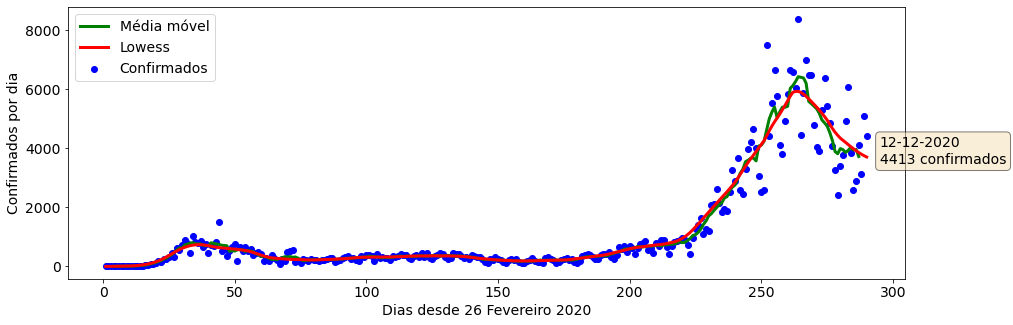

In [7]:
x = list(df.index)
data = list(df['data'])
y1 = list(df['delta_confirmados'])
y2 = list(df['delta_confirmados_MM'])
y3 = list(df['delta_confirmados_lowess'])

textstr = str(data[-1])+"\n"+str(int(y1[-1]))+" "+"confirmados"

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y1,label="Confirmados",color="blue")
plt.plot(x,y2,label="Média móvel",color="green",linewidth=3)
plt.plot(x,y3,label="Lowess",color="red",linewidth=3)
plt.legend()
plt.xlabel("Dias desde 26 Fevereiro 2020")
plt.ylabel("Confirmados por dia")
plt.text(x[-1]+5,y1[-1], textstr, fontsize=14, verticalalignment='top', bbox=props)
plt.show()

In [8]:
# drop das colunas desnecessárias
df.drop(df.iloc[:, 3:], inplace = True, axis=1) 
df.drop(df.iloc[:, 1:2], inplace = True, axis=1)

In [9]:
# escreve ficheiro CSV

# muda o nome das colunas
df.columns = ['dates', 'I']

# substitui o valor (na) por 0
df['I'] = df['I'].fillna(0)

# converte a primeira coluna em data
df['dates'] = pd.to_datetime(df['dates'], dayfirst=True)

# converte a segunda em inteiro
df['I'] = df['I'].astype(int)

# exporta o ficheiro CSV para ser processado
# https://harvardanalytics.shinyapps.io/covid19/
# http://covidsim.eu/
df.to_csv('covid-19-evolucao-PT.csv', sep = ',',index = False ,quoting = csv.QUOTE_NONNUMERIC, date_format = '%d/%m/%Y')